<a href="https://colab.research.google.com/github/frzkhtr/Attrition-Prediction-in-next-30-days/blob/main/Copy_of_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import sys
import dateutil.parser
from dateutil.relativedelta import relativedelta
#importing different module


import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, jaccard_score, roc_auc_score, confusion_matrix
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from matplotlib import pyplot
from xgboost import plot_importance
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from google.colab import drive
from sklearn.utils import shuffle
from xgboost import plot_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import ClusterCentroids

In [ ]:
train_df['Status'].value_counts()

Active      2002
Inactive      49
Name: Status, dtype: int64

In [ ]:
test_df['Status'].value_counts()

Active      2122
Inactive      73
Name: Status, dtype: int64

Direct Approach Including Hyper Parameter tuning

Model:
Decision Tree
XGboost
SVM

In [ ]:
#train = lag(train_df, 1)
#test = lag(test_df, 1)
col = ['PersonID_masked','Department', 'Level', 'tenure', 'Project_count', 'p2p_value', 'internal_pro_ratio',
       'earned_leave', 'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap', 'Status', 'PhysicalLocation']
train = train_df[col].copy()
test = test_df[col].copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 620 to 696
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PersonID_masked      2051 non-null   int64  
 1   Department           2051 non-null   object 
 2   Level                2051 non-null   object 
 3   tenure               2051 non-null   float64
 4   Project_count        2024 non-null   float64
 5   p2p_value            1955 non-null   float64
 6   internal_pro_ratio   2024 non-null   float64
 7   earned_leave         1580 non-null   float64
 8   sick/personal leave  1580 non-null   float64
 9   lwp                  1580 non-null   float64
 10  leave_last_3_months  1580 non-null   float64
 11  reward_gap           1175 non-null   float64
 12  certi_count          2051 non-null   float64
 13  certi_gap            792 non-null    float64
 14  Status               2051 non-null   object 
 15  PhysicalLocation     2051 non-null   

In [ ]:
train.Department.value_counts()

PPE                              965
Digital Infrastructure           389
Data Analytics & Engineering     311
Customer Experience Solution     123
Human Resource                    69
Finance and Administration        34
Information Systems               33
Cloud Engineering Studio          30
Design Studio                     30
House                             15
CRO                               11
PPE Prof. Services                10
IT Infrastructure                  8
Corporate Marketing                5
Business Operations                4
Delivery Excellence                3
Field Marketing                    3
Delivery Office                    3
Sustainability                     3
Executive Office                   1
Product Engineering                1
Name: Department, dtype: int64

In [ ]:
columns = ['Dep_PPE', 'Dep_Digital Infrastructure', 'Dep_Data Analytics & Engineering ', 'Dep_Customer Experience Solution']
train = pd.merge(left=train, left_index=True,
                  right=pd.get_dummies(train.Department, prefix='Dep')[columns], right_index=True,
                  how='left').copy()

test = pd.merge(left=test, left_index=True,
                  right=pd.get_dummies(test.Department, prefix='Dep')[columns], right_index=True,
                  how='left')


train = pd.merge(left=train, left_index=True,
                  right=pd.get_dummies(train.Level, prefix='Level'), right_index=True,
                  how='left').copy()

test = pd.merge(left=test, left_index=True,
                  right=pd.get_dummies(test.Level, prefix='Level'), right_index=True,
                  how='left')

encode = LabelEncoder()
train['Status'] = encode.fit_transform(train['Status'])
test['Status'] = encode.fit_transform(test['Status'])


columns = ['Project_count', 'earned_leave', 'sick/personal leave', 'lwp']
for col in columns:
    m = train[col].mean()
    train[col].fillna(value = m, inplace = True)
    m = test[col].mean()
    test[col].fillna(value = m, inplace = True)
test.fillna(value = 0, inplace = True)
train.fillna(value = 0, inplace = True)

train_ind = train[train['PhysicalLocation'] == 'USA'].copy()
train_usa = train[train['PhysicalLocation'] == 'USA']
test_ind = test[test['PhysicalLocation'] == 'USA'].copy()
test_usa = test[test['PhysicalLocation'] == 'USA']

In [ ]:
''''''lvl = {'6A': 6.5,
       'CW': 6.5,
       '6B': 6.5}
train.replace(lvl, inplace = True)
test.replace(lvl, inplace = True)
train['Level'] = train['Level'].apply(lambda x: float(x))
test['Level'] = test['Level'].apply(lambda x: float(x))

columns =  ['Status', 'Department']
encode = LabelEncoder()
for col in columns:
  i = train.columns.get_loc(col)
  train.iloc[:,i] = train.apply(lambda i:encode.fit_transform(i.astype(str)), axis=0, result_type='expand')
  i = test.columns.get_loc(col)
  test.iloc[:,i] = test.apply(lambda i:encode.fit_transform(i.astype(str)), axis=0, result_type='expand')
#train['Status'] = encode.fit_transform(train['Status'])
#test['Status'] = encode.fit_transform(test['Status'])
#train['Department'] = encode.fit_transform(train['Department'])
#test['Department'] = encode.fit_transform(test['Department'])
'''
train['Status'] = encode.fit_transform(train['Status'])
test['Status'] = encode.fit_transform(test['Status'])


columns = ['Project_count', 'earned_leave', 'sick/personal leave', 'lwp']
for col in columns:
    m = train[col].mean()
    train[col].fillna(value = m, inplace = True)
    m = test[col].mean()
    test[col].fillna(value = m, inplace = True)
test.fillna(value = 0, inplace = True)
train.fillna(value = 0, inplace = True)

train_ind = train[train['PhysicalLocation'] == 'India'].copy()
train_usa = train[train['PhysicalLocation'] == 'USA']
test_ind = test[test['PhysicalLocation'] == 'India'].copy()
test_usa = test[test['PhysicalLocation'] == 'USA']'''

SyntaxError: ignored

In [ ]:
test_ind.Status.value_counts()

0    283
1     14
Name: Status, dtype: int64

In [ ]:
col = ['tenure', 'Project_count', 'p2p_value', 'internal_pro_ratio',
       'earned_leave', 'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap', 'Dep_PPE', 'Dep_Digital Infrastructure', 'Dep_Data Analytics & Engineering ',
       'Dep_Customer Experience Solution', 'Level_5', 'Level_6', 'Level_6A', 'Level_7', 'Level_8']
x_train_ind = train_ind[col]
y_train_ind = train_ind['Status']
x_test_ind = test_ind[col]
y_test_ind = test_ind['Status']
x_train_usa = train_usa[col]
y_train_usa = train_usa['Status']
x_test_usa = test_usa[col]
y_test_usa = test_usa['Status']

In [ ]:
clf_d = LogisticRegression(class_weight = 'Balanced')
clf_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data : {clf_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {clf_d.score(x_test_ind, y_test_ind)}')
y_pred = clf_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data : 0.9630872483221476
Accuracy on Test Data: 0.9528619528619529
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       283
           1       0.50      0.07      0.12        14

    accuracy                           0.95       297
   macro avg       0.73      0.53      0.55       297
weighted avg       0.93      0.95      0.94       297



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,0,1
0,282,1
1,13,1


In [ ]:
#XGBoost
#hyper-parameter Tuning

#Providing a list of values for some xgboost model parameter
params = {
    'solver': ['newton-cg', 'lbfgs' , 'liblinear', 'sag', ''],
    'max_iter': [100, 200, 300, 400],
}


model = LogisticRegression()               #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'f1', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost
model_d = random_search.best_estimator_

model_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind, y_test_ind)}')

y_pred = model_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy on Train Data: 0.9630872483221476
Accuracy on Test Data: 0.9528619528619529
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       283
           1       0.50      0.07      0.12        14

    accuracy                           0.95       297
   macro avg       0.73      0.53      0.55       297
weighted avg       0.93      0.95      0.94       297



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


,0,1
0,282,1
1,13,1


In [ ]:
#Building a naive Decision tree model with its deault value

clf_d = RandomForestClassifier() 
clf_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data : {clf_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {clf_d.score(x_test_ind, y_test_ind)}')
y_pred = clf_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data : 1.0
Accuracy on Test Data: 0.9494949494949495
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       283
           1       0.00      0.00      0.00        14

    accuracy                           0.95       297
   macro avg       0.48      0.50      0.49       297
weighted avg       0.91      0.95      0.93       297



,0,1
0,282,1
1,14,0


In [ ]:
#XGBoost
#hyper-parameter Tuning

#Providing a list of values for some xgboost model parameter
params = {
    'max_depth': [3,5,7,9,11,13],                          
    'n_estimators': [200,400,600,800],
    'criterion': ['gini', 'entropy']
}


model = RandomForestClassifier()                 #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'f1', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost
model_d = random_search.best_estimator_

model_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind, y_test_ind)}')

y_pred = model_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.5min finished


Accuracy on Train Data: 0.9990796134376438
Accuracy on Test Data: 0.9770755885997522
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1579
           1       0.00      0.00      0.00        35

    accuracy                           0.98      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.96      0.98      0.97      1614



,0,1
0,1577,2
1,35,0


In [ ]:
#Building a naive Decision tree model with its deault value

clf_d = DecisionTreeClassifier() 
clf_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data : {clf_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {clf_d.score(x_test_ind, y_test_ind)}')
y_pred = clf_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data : 1.0
Accuracy on Test Data: 0.9292929292929293
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       283
           1       0.00      0.00      0.00        14

    accuracy                           0.93       297
   macro avg       0.48      0.49      0.48       297
weighted avg       0.91      0.93      0.92       297



,0,1
0,276,7
1,14,0


In [ ]:
model_d = xgboost.XGBClassifier()
model_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind, y_test_ind)}')
y_pred = model_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data: 0.9798657718120806
Accuracy on Test Data: 0.9494949494949495
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       283
           1       0.00      0.00      0.00        14

    accuracy                           0.95       297
   macro avg       0.48      0.50      0.49       297
weighted avg       0.91      0.95      0.93       297



,0,1
0,282,1
1,14,0


In [ ]:
#XGBoost
#hyper-parameter Tuning

#Providing a list of values for some xgboost model parameter
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [11, 13, 15, 17, 19],
    'min_child_weight': [1, 2, 3, 5,7, 9],                            
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'n_estimators': [200,400,600,800],
    'scale_pos_weight': [1, 5, 10, 20, 25, 50, 75, 100]
}


model = xgboost.XGBClassifier()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'f1', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost
model_d = random_search.best_estimator_

model_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind, y_test_ind)}')

y_pred = model_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 147 out of 150 | elapsed:   11.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.5s finished


Accuracy on Train Data: 0.9865771812080537
Accuracy on Test Data: 0.9158249158249159
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       283
           1       0.00      0.00      0.00        14

    accuracy                           0.92       297
   macro avg       0.48      0.48      0.48       297
weighted avg       0.91      0.92      0.91       297



,0,1
0,272,11
1,14,0


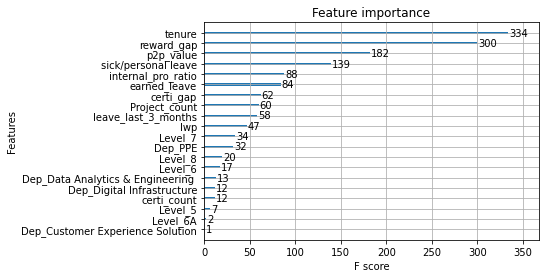

In [ ]:
lplot_importance(model_d)
pyplot.show()

In [ ]:
weights = {0:1, 1:22}
model = SVC(kernel =  'poly',class_weight = weights)
model.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on test Data: {model.score(x_test_ind, y_test_ind)}')
y_pred = model.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data: 0.738255033557047
Accuracy on test Data: 0.7003367003367004
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       283
           1       0.04      0.21      0.06        14

    accuracy                           0.70       297
   macro avg       0.49      0.47      0.44       297
weighted avg       0.91      0.70      0.79       297



,0,1
0,205,78
1,11,3


In [ ]:
params = {
    'C': [0.10,0.20,0.30, 0.5, 0.7, 0.9, 1, 1.5],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'class_weight': ['balanced']
}
model = SVC()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost

model = random_search.best_estimator_
model.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on test Data: {model.score(x_test_ind, y_test_ind)}')
y_pred = model.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.0min finished


Accuracy on Train Data: 0.5922687528762081
Accuracy on test Data: 0.36369268897149937
              precision    recall  f1-score   support

           0       0.99      0.35      0.52      1579
           1       0.03      0.77      0.05        35

    accuracy                           0.36      1614
   macro avg       0.51      0.56      0.29      1614
weighted avg       0.97      0.36      0.51      1614



,0,1
0,560,1019
1,8,27


Adding Performance Data

In [ ]:
train = lag(train_df, 1)
test = lag(test_df, 1)
col = ['PersonID_masked','Department', 'Level', 'tenure', 'Project_count', 'p2p_value', 'internal_pro_ratio',
       'earned_leave', 'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap', 'Status', 'PhysicalLocation']
train = train[col].copy()
test = test[col].copy()
train.info()

NameError: ignored

In [ ]:
performance_replace = {
    'Exceeds Goals': 1, 'Achieves Goals': 0, 'Significantly Exceeds Goals': 2, 'Not meeting goals': -1, '-': 0,
    'Not Meeting Goals': -1, 'Exceeds Goal': 1, 'Achieves Goal': 0, 'Not Meeting Goal': -1 , 'na': 0
}

df.replace(performance_replace, inplace = True)

In [ ]:
df.fillna(value= 9999, inplace = True)
ls = []
for i in range(df.shape[0]):
    value = 0
    v = []
    for j in range(1,4):
        if df.iloc[i][j] == 9999:
            pass
        else:
            v.append(j * df.iloc[i][j])
    if len(v) > 0:
        value = sum(v)/ len(v)
    ls.append(value)
df['performance'] = ls

In [ ]:
df['PersonID_masked'] = df['PersonID_Masked']
df.drop(['PersonID_Masked'], axis = 1, inplace = True)

In [ ]:
train = train.merge(df, on = 'PersonID_masked', how = 'left').copy()
test = test.merge(df, on = 'PersonID_masked', how = 'left').copy()

In [ ]:
lvl = {'6A': 6.5,
       'CW': 6.5,
       '6B': 6.5}
train.replace(lvl, inplace = True)
test.replace(lvl, inplace = True)
train['Level'] = train['Level'].apply(lambda x: float(x))
test['Level'] = test['Level'].apply(lambda x: float(x))

columns =  ['Status', 'Department']
encode = LabelEncoder()
for col in columns:
  i = train.columns.get_loc(col)
  train.iloc[:,i] = train.apply(lambda i:encode.fit_transform(i.astype(str)), axis=0, result_type='expand')
  i = test.columns.get_loc(col)
  test.iloc[:,i] = test.apply(lambda i:encode.fit_transform(i.astype(str)), axis=0, result_type='expand')
#    train[col] = encode.fit_transform(train[col])
#    test[col] = encode.fit_transform(test[col])




columns = ['Project_count', 'earned_leave', 'sick/personal leave', 'lwp']
for col in columns:
    m = train[col].mean()
    train[col].fillna(value = m, inplace = True)
    m = test[col].mean()
    test[col].fillna(value = m, inplace = True)
test.fillna(value = 0, inplace = True)
train.fillna(value = 0, inplace = True)

train_ind = train[train['PhysicalLocation'] == 'India'].copy()
train_usa = train[train['PhysicalLocation'] == 'USA']
test_ind = test[test['PhysicalLocation'] == 'India'].copy()
test_usa = test[test['PhysicalLocation'] == 'USA']

In [ ]:
col = ['Department', 'Level', 'tenure', 'Project_count', 'p2p_value', 'internal_pro_ratio',
       'earned_leave', 'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap', 'performance', 'compa_Ratio']
x_train_ind = train_ind[col]
y_train_ind = train_ind['Status']
x_test_ind = test_ind[col]
y_test_ind = test_ind['Status']
x_train_usa = train_usa[col]
y_train_usa = train_usa['Status']
x_test_usa = test_usa[col]
y_test_usa = test_usa['Status']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PersonID_masked       2342 non-null   int64  
 1   Department            2342 non-null   int64  
 2   Level                 2342 non-null   float64
 3   tenure                2342 non-null   float64
 4   Project_count         2342 non-null   float64
 5   p2p_value             2342 non-null   float64
 6   internal_pro_ratio    2342 non-null   float64
 7   earned_leave          2342 non-null   float64
 8   sick/personal leave   2342 non-null   float64
 9   lwp                   2342 non-null   float64
 10  leave_last_3_months   2342 non-null   float64
 11  reward_gap            2342 non-null   float64
 12  certi_count           2342 non-null   float64
 13  certi_gap             2342 non-null   float64
 14  Status                2342 non-null   int64  
 15  PhysicalLocation     

In [ ]:
#Building a naive Decision tree model with its deault value

clf_d = DecisionTreeClassifier() 
clf_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data : {clf_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {clf_d.score(x_test_ind, y_test_ind)}')
y_pred = clf_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data : 1.0
Accuracy on Test Data: 0.9440242057488654
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1934
           1       0.04      0.06      0.05        49

    accuracy                           0.94      1983
   macro avg       0.51      0.51      0.51      1983
weighted avg       0.95      0.94      0.95      1983



,0,1
0,1869,65
1,46,3


In [ ]:
model_d = xgboost.XGBClassifier()
model_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind, y_test_ind)}')
y_pred = model_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data: 0.9822454308093995
Accuracy on Test Data: 0.9722642460917801
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1934
           1       0.00      0.00      0.00        49

    accuracy                           0.97      1983
   macro avg       0.49      0.50      0.49      1983
weighted avg       0.95      0.97      0.96      1983



,0,1
0,1928,6
1,49,0


In [ ]:
#XGBoost
#hyper-parameter Tuning

#Providing a list of values for some xgboost model parameter
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,5,7,9,11],
    'min_child_weight': [1, 2, 3, 5,7, 9],                            
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'n_estimators': [200,400,600,800],
    'scale_pos_weight': [1, 5, 10, 20, 25, 50, 75, 100]
}


model = xgboost.XGBClassifier()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'f1', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost
model_d = random_search.best_estimator_

model_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind, y_test_ind)}')

y_pred = model_d.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   47.9s finished


Accuracy on Train Data: 0.9890339425587468
Accuracy on Test Data: 0.9324256177508825
              precision    recall  f1-score   support

           0       0.98      0.96      0.96      1934
           1       0.02      0.04      0.03        49

    accuracy                           0.93      1983
   macro avg       0.50      0.50      0.50      1983
weighted avg       0.95      0.93      0.94      1983



,0,1
0,1847,87
1,47,2


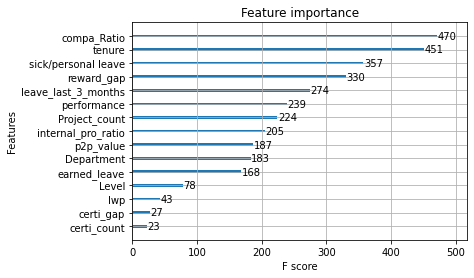

In [ ]:
plot_importance(model_d)
pyplot.show()

In [ ]:
weights = {0:1.0, 1:22}
model = SVC(kernel =  'linear',class_weight = weights)
model.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on test Data: {model.score(x_test_ind, y_test_ind)}')
y_pred = model.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data: 0.791644908616188
Accuracy on test Data: 0.8088754412506304
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1934
           1       0.04      0.31      0.07        49

    accuracy                           0.81      1983
   macro avg       0.51      0.56      0.48      1983
weighted avg       0.96      0.81      0.87      1983



,0,1
0,1589,345
1,34,15


In [ ]:
params = {
    'C': [0.10,0.20,0.30, 0.5, 0.7, 0.9, 1, 1.5],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'class_weight': ['balanced']
}
model = SVC()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost

model = random_search.best_estimator_
model.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on test Data: {model.score(x_test_ind, y_test_ind)}')
y_pred = model.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.2min finished


Accuracy on Train Data: 0.8992167101827676
Accuracy on test Data: 0.9092284417549168
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1934
           1       0.05      0.16      0.08        49

    accuracy                           0.91      1983
   macro avg       0.52      0.55      0.52      1983
weighted avg       0.95      0.91      0.93      1983



,0,1
0,1795,139
1,41,8


Using Imbalanced learn libraries

In [ ]:
#train = lag(train_df, 1)
#test = lag(test_df, 1)
col = ['PersonID_masked','Department', 'Level', 'tenure', 'Project_count', 'p2p_value', 'internal_pro_ratio',
       'earned_leave', 'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap', 'Status', 'PhysicalLocation']
train = train[col].copy()
test = test[col].copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 620 to 696
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PersonID_masked      2051 non-null   int64  
 1   Department           2051 non-null   object 
 2   Level                2051 non-null   object 
 3   tenure               2051 non-null   float64
 4   Project_count        2051 non-null   float64
 5   p2p_value            2051 non-null   float64
 6   internal_pro_ratio   2051 non-null   float64
 7   earned_leave         2051 non-null   float64
 8   sick/personal leave  2051 non-null   float64
 9   lwp                  2051 non-null   float64
 10  leave_last_3_months  2051 non-null   float64
 11  reward_gap           2051 non-null   float64
 12  certi_count          2051 non-null   float64
 13  certi_gap            2051 non-null   float64
 14  Status               2051 non-null   int64  
 15  PhysicalLocation     2051 non-null   

In [ ]:
columns = ['Dep_PPE', 'Dep_Digital Infrastructure', 'Dep_Data Analytics & Engineering ', 'Dep_Customer Experience Solution']
train = pd.merge(left=train, left_index=True,
                  right=pd.get_dummies(train.Department, prefix='Dep')[columns], right_index=True,
                  how='left').copy()

test = pd.merge(left=test, left_index=True,
                  right=pd.get_dummies(test.Department, prefix='Dep')[columns], right_index=True,
                  how='left')


train = pd.merge(left=train, left_index=True,
                  right=pd.get_dummies(train.Level, prefix='Level'), right_index=True,
                  how='left').copy()

test = pd.merge(left=test, left_index=True,
                  right=pd.get_dummies(test.Level, prefix='Level'), right_index=True,
                  how='left')


train['Status'] = encode.fit_transform(train['Status'])
test['Status'] = encode.fit_transform(test['Status'])


columns = ['Project_count', 'earned_leave', 'sick/personal leave', 'lwp']
for col in columns:
    m = train[col].mean()
    train[col].fillna(value = m, inplace = True)
    m = test[col].mean()
    test[col].fillna(value = m, inplace = True)
test.fillna(value = 0, inplace = True)
train.fillna(value = 0, inplace = True)

train_ind = train[train['PhysicalLocation'] == 'USA'].copy()
train_usa = train[train['PhysicalLocation'] == 'USA']
test_ind = test[test['PhysicalLocation'] == 'USA'].copy()
test_usa = test[test['PhysicalLocation'] == 'USA']

In [ ]:
'''lvl = {'6A': 6.5,
       'CW': 6.5,
       '6B': 6.5}
train.replace(lvl, inplace = True)
test.replace(lvl, inplace = True)
train['Level'] = train['Level'].apply(lambda x: float(x))
test['Level'] = test['Level'].apply(lambda x: float(x))

columns =  ['Status', 'Department']
encode = LabelEncoder()
for col in columns:
  i = train.columns.get_loc(col)
  train.iloc[:,i] = train.apply(lambda i:encode.fit_transform(i.astype(str)), axis=0, result_type='expand')
  i = test.columns.get_loc(col)
  test.iloc[:,i] = test.apply(lambda i:encode.fit_transform(i.astype(str)), axis=0, result_type='expand')
#    train[col] = encode.fit_transform(train[col])
#    test[col] = encode.fit_transform(test[col])




columns = ['Project_count', 'earned_leave', 'sick/personal leave', 'lwp']
for col in columns:
    m = train[col].mean()
    train[col].fillna(value = m, inplace = True)
    m = test[col].mean()
    test[col].fillna(value = m, inplace = True)
test.fillna(value = 0, inplace = True)
train.fillna(value = 0, inplace = True)

train_ind = train[train['PhysicalLocation'] == 'India'].copy()
train_usa = train[train['PhysicalLocation'] == 'USA']
test_ind = test[test['PhysicalLocation'] == 'India'].copy()
test_usa = test[test['PhysicalLocation'] == 'USA']'''

In [ ]:
train_ind.columns

Index(['PersonID_masked', 'Department', 'Level', 'tenure', 'Project_count',
       'p2p_value', 'internal_pro_ratio', 'earned_leave',
       'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap', 'Status', 'PhysicalLocation', 'Dep_PPE',
       'Dep_Digital Infrastructure', 'Dep_Data Analytics & Engineering ',
       'Dep_Customer Experience Solution', 'Level_5', 'Level_6', 'Level_6A',
       'Level_6B', 'Level_7', 'Level_8'],
      dtype='object')

In [ ]:
col = ['tenure', 'Project_count', 'p2p_value', 'internal_pro_ratio',
       'earned_leave', 'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap',  'Dep_PPE', 'Dep_Digital Infrastructure', 'Dep_Data Analytics & Engineering ',
       'Dep_Customer Experience Solution', 'Level_5', 'Level_6', 'Level_6A', 'Level_7', 'Level_8']
x_train_ind = train_ind[col]
y_train_ind = train_ind['Status']
x_test_ind = test_ind[col]
y_test_ind = test_ind['Status']
x_train_usa = train_usa[col]
y_train_usa = train_usa['Status']
x_test_usa = test_usa[col]
y_test_usa = test_usa['Status']

In [ ]:
oversample = SMOTE()
x_train_ind, y_train_ind = oversample.fit_resample(x_train_ind, y_train_ind)
#x_train_usa, y_train_usa = oversample.fit_resample(x_train_usa, y_train_usa)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_train_ind, y_train_ind = oversample.fit_resample(x_train_ind, y_train_ind)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Building a naive Decision tree model with its deault value

clf_d = DecisionTreeClassifier() 
clf_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data : {clf_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {clf_d.score(x_test_ind.values, y_test_ind)}')
y_pred = clf_d.predict(x_test_ind.values)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data : 1.0
Accuracy on Test Data: 0.936026936026936
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       283
           1       0.00      0.00      0.00        14

    accuracy                           0.94       297
   macro avg       0.48      0.49      0.48       297
weighted avg       0.91      0.94      0.92       297



,0,1
0,278,5
1,14,0


In [ ]:
model_d = xgboost.XGBClassifier()
model_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind.values, y_test_ind)}')
y_pred = model_d.predict(x_test_ind.values)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data: 0.9965156794425087
Accuracy on Test Data: 0.9191919191919192
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       283
           1       0.08      0.07      0.08        14

    accuracy                           0.92       297
   macro avg       0.52      0.52      0.52       297
weighted avg       0.91      0.92      0.92       297



,0,1
0,272,11
1,13,1


In [ ]:
#XGBoost
#hyper-parameter Tuning

#Providing a list of values for some xgboost model parameter
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,5,7,9,11],
    'min_child_weight': [1, 2, 3, 5,7, 9],                            
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'n_estimators': [200,400,600,800],
    'scale_pos_weight': [1, 5, 10, 20, 25, 50, 75, 100]
}


model = xgboost.XGBClassifier()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'recall', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost
model_d = random_search.best_estimator_

model_d.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind.values, y_test_ind)}')

y_pred = model_d.predict(x_test_ind.values)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   20.3s finished


Accuracy on Train Data: 1.0
Accuracy on Test Data: 0.972318339100346
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       285
           1       0.00      0.00      0.00         4

    accuracy                           0.97       289
   macro avg       0.49      0.49      0.49       289
weighted avg       0.97      0.97      0.97       289



,0,1
0,281,4
1,4,0


In [ ]:
weights = {0:1.0, 1:22}
model = SVC(kernel =  'linear',class_weight = 'balanced')
model.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on test Data: {model.score(x_test_ind, y_test_ind)}')
y_pred = model.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data: 0.8780487804878049
Accuracy on test Data: 0.6801346801346801
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       283
           1       0.02      0.14      0.04        14

    accuracy                           0.68       297
   macro avg       0.48      0.42      0.42       297
weighted avg       0.90      0.68      0.77       297



,0,1
0,200,83
1,12,2


Using PCA

In [ ]:
#train = lag(train_df, 1)
#test = lag(test_df, 1)
col = ['PersonID_masked','Department', 'Level', 'tenure', 'Project_count', 'p2p_value', 'internal_pro_ratio',
       'earned_leave', 'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap', 'Status', 'PhysicalLocation']
train = train[col].copy()
test = test[col].copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2559 entries, 154 to 1547
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PersonID_masked      2559 non-null   int64  
 1   Department           2559 non-null   object 
 2   Level                2559 non-null   object 
 3   tenure               2559 non-null   float64
 4   Project_count        2559 non-null   float64
 5   p2p_value            2559 non-null   float64
 6   internal_pro_ratio   2559 non-null   float64
 7   earned_leave         2559 non-null   float64
 8   sick/personal leave  2559 non-null   float64
 9   lwp                  2559 non-null   float64
 10  leave_last_3_months  2559 non-null   float64
 11  reward_gap           2559 non-null   float64
 12  certi_count          2559 non-null   float64
 13  certi_gap            2559 non-null   float64
 14  Status               2559 non-null   int64  
 15  PhysicalLocation     2559 non-null  

In [ ]:
columns = ['Dep_PPE', 'Dep_Digital Infrastructure', 'Dep_Data Analytics & Engineering ', 'Dep_Customer Experience Solution']
train = pd.merge(left=train, left_index=True,
                  right=pd.get_dummies(train.Department, prefix='Dep')[columns], right_index=True,
                  how='left').copy()

test = pd.merge(left=test, left_index=True,
                  right=pd.get_dummies(test.Department, prefix='Dep')[columns], right_index=True,
                  how='left')


train = pd.merge(left=train, left_index=True,
                  right=pd.get_dummies(train.Level, prefix='Level'), right_index=True,
                  how='left').copy()

test = pd.merge(left=test, left_index=True,
                  right=pd.get_dummies(test.Level, prefix='Level'), right_index=True,
                  how='left')


train['Status'] = encode.fit_transform(train['Status'])
test['Status'] = encode.fit_transform(test['Status'])


columns = ['Project_count', 'earned_leave', 'sick/personal leave', 'lwp']
for col in columns:
    m = train[col].mean()
    train[col].fillna(value = m, inplace = True)
    m = test[col].mean()
    test[col].fillna(value = m, inplace = True)
test.fillna(value = 0, inplace = True)
train.fillna(value = 0, inplace = True)

train_ind = train[train['PhysicalLocation'] == 'India'].copy()
train_usa = train[train['PhysicalLocation'] == 'USA']
test_ind = test[test['PhysicalLocation'] == 'India'].copy()
test_usa = test[test['PhysicalLocation'] == 'USA']

In [ ]:
lvl = {'6A': 6.5,
       'CW': 6.5,
       '6B': 6.5}
train.replace(lvl, inplace = True)
test.replace(lvl, inplace = True)
train['Level'] = train['Level'].apply(lambda x: float(x))
test['Level'] = test['Level'].apply(lambda x: float(x))

columns =  ['Status', 'Department']
encode = LabelEncoder()
for col in columns:
  i = train.columns.get_loc(col)
  train.iloc[:,i] = train.apply(lambda i:encode.fit_transform(i.astype(str)), axis=0, result_type='expand')
  i = test.columns.get_loc(col)
  test.iloc[:,i] = test.apply(lambda i:encode.fit_transform(i.astype(str)), axis=0, result_type='expand')
#    train[col] = encode.fit_transform(train[col])
#    test[col] = encode.fit_transform(test[col])




columns = ['Project_count', 'earned_leave', 'sick/personal leave', 'lwp']
for col in columns:
    m = train[col].mean()
    train[col].fillna(value = m, inplace = True)
    m = test[col].mean()
    test[col].fillna(value = m, inplace = True)
test.fillna(value = 0, inplace = True)
train.fillna(value = 0, inplace = True)

train_ind = train[train['PhysicalLocation'] == 'India'].copy()
train_usa = train[train['PhysicalLocation'] == 'USA']
test_ind = test[test['PhysicalLocation'] == 'India'].copy()
test_usa = test[test['PhysicalLocation'] == 'USA']

In [ ]:
col = ['tenure', 'Project_count', 'p2p_value', 'internal_pro_ratio',
       'earned_leave', 'sick/personal leave', 'lwp', 'leave_last_3_months', 'reward_gap',
       'certi_count', 'certi_gap',  'Dep_PPE', 'Dep_Digital Infrastructure', 'Dep_Data Analytics & Engineering ',
       'Dep_Customer Experience Solution', 'Level_5', 'Level_6', 'Level_6A', 'Level_7', 'Level_8']
x_train_ind = train_ind[col]
y_train_ind = train_ind['Status']
x_test_ind = test_ind[col]
y_test_ind = test_ind['Status']
x_train_usa = train_usa[col]
y_train_usa = train_usa['Status']
x_test_usa = test_usa[col]
y_test_usa = test_usa['Status']

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_train_ind, y_train_ind = oversample.fit_resample(x_train_ind, y_train_ind)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


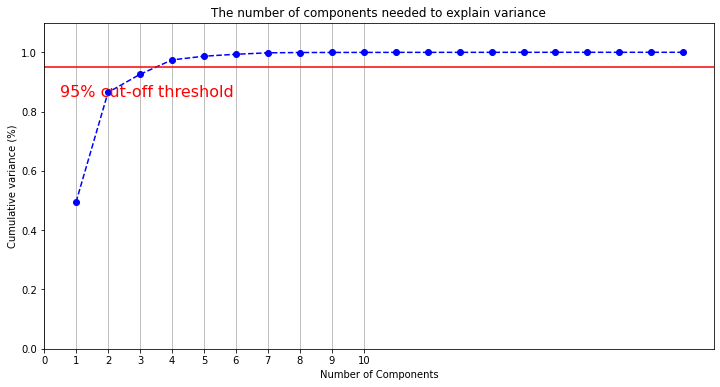

In [ ]:
svd = PCA().fit(x_train_ind)
#svd = TruncatedSVD(n_components=3)
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 21, step=1)
y = np.cumsum(svd.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
scaler = MinMaxScaler()
x_train_ind = scaler.fit_transform(x_train_ind)
x_test_ind = scaler.fit_transform(x_test_ind)
pca = PCA(n_components=4)
pca.fit(x_train_ind)
x_train_ind_pca = pca.transform(x_train_ind)
pca.fit(x_test_ind)
x_test_ind_pca = pca.transform(x_test_ind)

In [ ]:
#Building a naive Decision tree model with its deault value

clf_d = DecisionTreeClassifier()
clf_d.fit(x_train_ind_pca, y_train_ind)
print(f'Accuracy on Train Data : {clf_d.score(x_train_ind_pca, y_train_ind)}')
print(f'Accuracy on Test Data: {clf_d.score(x_test_ind_pca, y_test_ind)}')
y_pred = clf_d.predict(x_test_ind_pca)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data : 0.9911214953271028
Accuracy on Test Data: 0.9671623296158612
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1579
           1       0.00      0.00      0.00        35

    accuracy                           0.97      1614
   macro avg       0.49      0.49      0.49      1614
weighted avg       0.96      0.97      0.96      1614



,0,1
0,1561,18
1,35,0


In [ ]:
model_d = xgboost.XGBClassifier()
model_d.fit(x_train_ind_pca, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind_pca, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind_pca, y_test_ind)}')
y_pred = model_d.predict(x_test_ind_pca)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data: 0.9567757009345794
Accuracy on Test Data: 0.7955390334572491
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1579
           1       0.02      0.20      0.04        35

    accuracy                           0.80      1614
   macro avg       0.50      0.50      0.46      1614
weighted avg       0.96      0.80      0.87      1614



,0,1
0,1277,302
1,28,7


In [ ]:
#XGBoost
#hyper-parameter Tuning

#Providing a list of values for some xgboost model parameter
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [11, 13, 15, 17, 19],
    'min_child_weight': [1, 2, 3, 5,7, 9],                            
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'n_estimators': [200,400,600,800],
    'scale_pos_weight': [1, 5, 10, 20, 25, 50, 75, 100]
}


model = xgboost.XGBClassifier()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'recall', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind_pca,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost
model_d = random_search.best_estimator_

model_d.fit(x_train_ind_pca, y_train_ind)
print(f'Accuracy on Train Data: {model_d.score(x_train_ind_pca, y_train_ind)}')
print(f'Accuracy on Test Data: {model_d.score(x_test_ind_pca, y_test_ind)}')

y_pred = model_d.predict(x_test_ind_pca)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.1min finished


Accuracy on Train Data: 0.9901869158878505
Accuracy on Test Data: 0.9405204460966543
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1579
           1       0.00      0.00      0.00        35

    accuracy                           0.94      1614
   macro avg       0.49      0.48      0.48      1614
weighted avg       0.96      0.94      0.95      1614



,0,1
0,1518,61
1,35,0


In [ ]:
weights = {0:1.0, 1:22}
model = SVC(kernel =  'linear',class_weight = weights)
model.fit(x_train_ind_pca, y_train_ind)
print(f'Accuracy on Train Data: {model.score(x_train_ind_pca, y_train_ind)}')
print(f'Accuracy on test Data: {model.score(x_test_ind_pca, y_test_ind)}')
y_pred = model.predict(x_test_ind_pca)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Accuracy on Train Data: 0.9852045256744996
Accuracy on test Data: 0.983843537414966
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1157
           1       0.00      0.00      0.00        19

    accuracy                           0.98      1176
   macro avg       0.49      0.50      0.50      1176
weighted avg       0.97      0.98      0.98      1176



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,1157,0
1,19,0


In [ ]:
'''exit = pd.read_excel('/content/drive/MyDrive/ATTRITION_DATA/Exit_Reasons_Masked.xlsx')
exit['PersonID_masked'] = exit['PersonID_Masked']
exit.drop(['PersonID_Masked'], axis = 1, inplace = True)
train = train.merge(exit, on = 'PersonID_masked', how = 'left').copy()
test = test.merge(exit, on = 'PersonID_masked', how = 'left').copy()
ind = train[train['Termination Category'] == 'Involuntary'].index
train.drop(ind, inplace = True)
ind = test[test['Termination Category'] == 'Involuntary'].index
test.drop(ind, inplace = True)'''

"exit = pd.read_excel('/content/drive/MyDrive/ATTRITION_DATA/Exit_Reasons_Masked.xlsx')\nexit['PersonID_masked'] = exit['PersonID_Masked']\nexit.drop(['PersonID_Masked'], axis = 1, inplace = True)\ntrain = train.merge(exit, on = 'PersonID_masked', how = 'left').copy()\ntest = test.merge(exit, on = 'PersonID_masked', how = 'left').copy()\nind = train[train['Termination Category'] == 'Involuntary'].index\ntrain.drop(ind, inplace = True)\nind = test[test['Termination Category'] == 'Involuntary'].index\ntest.drop(ind, inplace = True)"

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_train_ind.head()

,Department,Level,tenure,Project_count,p2p_value,internal_pro_ratio,earned_leave,sick/personal leave,lwp,leave_last_3_months,reward_gap,certi_count,certi_gap
2,21,6.0,18.966667,3.0,0.2,0.666667,7.000000,24.000000,0.000000,2.0,7.433333,0.0,0.0
3,21,6.0,18.966667,3.0,0.2,0.666667,7.000000,24.000000,0.000000,2.0,7.433333,0.0,0.0
6,21,7.0,1.000000,1.0,0.2,0.000000,4.737653,34.926206,0.466589,0.0,0.000000,0.0,0.0
7,21,7.0,1.000000,1.0,0.2,0.000000,4.737653,34.926206,0.466589,0.0,0.000000,0.0,0.0
8,12,8.0,63.533333,4.0,0.4,0.333333,8.000000,16.000000,11.000000,0.0,32.233333,0.0,0.0


In [ ]:
y

array([0.66543695, 0.92489283, 0.94823508, 0.9678855 , 0.97964866,
       0.99066238, 0.99742392, 0.99912162, 0.99952771, 0.99974164,
       0.99994212, 0.99997579, 1.        ])

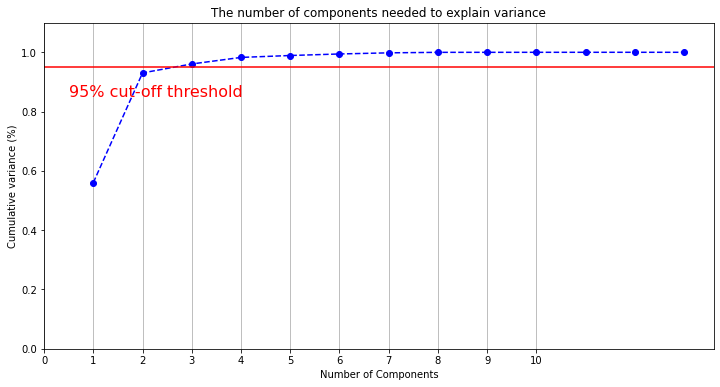

In [ ]:
svd = PCA().fit(x_train_ind)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(svd.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
scaler = MinMaxScaler()
x_train_ind = scaler.fit_transform(x_train_ind)
svd = TruncatedSVD(n_components=3)
svd.fit(x_train_ind)
pca = PCA(n_components=3)
pca.fit(x_train_ind)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_train_ind_svd = svd.transform(x_train_ind)
x_test_ind_svd = svd.transform(x_test_ind)

In [ ]:
x_train_ind_pca = pca.transform(x_train_ind)
x_test_ind_pca = pca.transform(x_test_ind)

In [ ]:
'''x_train_ind['compa_Ratio'].replace({9999: 100}, inplace = True)
x_train_ind['performance'].replace({9999: 0}, inplace = True)
x_test_ind['compa_Ratio'].replace({9999: 100}, inplace = True)
x_test_ind['performance'].replace({9999: 0}, inplace = True)
x_train_usa['compa_Ratio'].replace({9999: 100}, inplace = True)
x_train_usa['performance'].replace({9999: 0}, inplace = True)
x_test_usa['compa_Ratio'].replace({9999: 100}, inplace = True)
x_test_usa['performance'].replace({9999: 0}, inplace = True)'''

"x_train_ind['compa_Ratio'].replace({9999: 100}, inplace = True)\nx_train_ind['performance'].replace({9999: 0}, inplace = True)\nx_test_ind['compa_Ratio'].replace({9999: 100}, inplace = True)\nx_test_ind['performance'].replace({9999: 0}, inplace = True)\nx_train_usa['compa_Ratio'].replace({9999: 100}, inplace = True)\nx_train_usa['performance'].replace({9999: 0}, inplace = True)\nx_test_usa['compa_Ratio'].replace({9999: 100}, inplace = True)\nx_test_usa['performance'].replace({9999: 0}, inplace = True)"

In [ ]:
'''x_train_ind['compa_Ratio'] = x_train_ind['compa_Ratio'].apply(lambda x: x/100)
x_test_ind['compa_Ratio'] = x_test_ind['compa_Ratio'].apply(lambda x: x/100)
x_train_usa['compa_Ratio'] = x_train_usa['compa_Ratio'].apply(lambda x: x/100)
x_test_usa['compa_Ratio'] = x_test_usa['compa_Ratio'].apply(lambda x: x/100)'''

"x_train_ind['compa_Ratio'] = x_train_ind['compa_Ratio'].apply(lambda x: x/100)\nx_test_ind['compa_Ratio'] = x_test_ind['compa_Ratio'].apply(lambda x: x/100)\nx_train_usa['compa_Ratio'] = x_train_usa['compa_Ratio'].apply(lambda x: x/100)\nx_test_usa['compa_Ratio'] = x_test_usa['compa_Ratio'].apply(lambda x: x/100)"

In [ ]:
'''oversample = SMOTE()
x_train_ind, y_train_ind = oversample.fit_resample(x_train_ind, y_train_ind)
#x_train_usa, y_train_usa = oversample.fit_resample(x_train_usa, y_train_usa)'''

'oversample = SMOTE()\nx_train_ind, y_train_ind = oversample.fit_resample(x_train_ind, y_train_ind)\n#x_train_usa, y_train_usa = oversample.fit_resample(x_train_usa, y_train_usa)'

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
x_train_ind, y_train_ind = cc.fit_resample(x_train_ind, y_train_ind)
#x_test_ind, y_test_ind = cc.fit_resample(x_test_ind, y_test_ind)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
#building a naive Xgboost model with its default value
model_d = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=1, verbosity=1)

model_d.fit(x_train_ind_pca, y_train_ind)
model_d.score(x_train_ind_pca, y_train_ind)

1.0

In [ ]:
model_d.score(x_test_ind_pca, y_test_ind)

0.5798485347382285

In [ ]:
y_pred = model_d.predict(x_test_ind_pca)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.58      0.73      3002
           1       0.01      0.31      0.02        35

    accuracy                           0.58      3037
   macro avg       0.50      0.45      0.37      3037
weighted avg       0.98      0.58      0.72      3037



In [ ]:
#Confusion Matrix
y_pred = model_d.predict(x_test_ind_pca)
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

,0,1
0,1750,1252
1,24,11


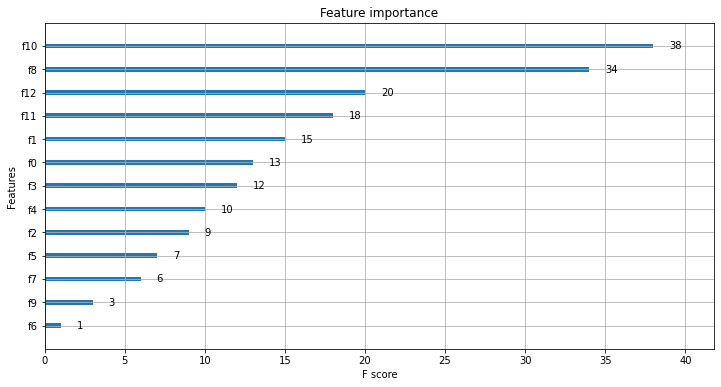

In [ ]:
from xgboost import plot_importance
plot_importance(model_d)
pyplot.show()

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd')
	return model

In [ ]:
n_input = x_test_ind.shape[1]
model = define_model(n_input)

In [ ]:
weights = {0:1, 1:10}
model.fit(x_train_ind, y_train_ind, class_weight=weights, epochs = 100, verbose = 0)

In [ ]:
y_pred = model.predict(x_test_ind)
y_pred = [x[0] for x in y_pred]

In [ ]:
roc_auc_score(y_test_ind, y_pred)

0.4486532787665366

In [ ]:
y_pred1 = list(map((lambda x: 0 if x < 0.85 else 1), list(y_pred)))

In [ ]:
print(classification_report(y_test_ind, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.43      0.59      3002
           1       0.01      0.54      0.02        35

    accuracy                           0.43      3037
   macro avg       0.50      0.48      0.31      3037
weighted avg       0.98      0.43      0.59      3037



In [ ]:
pd.DataFrame(confusion_matrix(y_test_ind, y_pred1))

,0,1
0,1276,1726
1,16,19


In [ ]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

In [ ]:
weights = {0:1.0, 1:22}
model = SVC(kernel =  'linear',class_weight = weights)
model.fit(x_train_ind, y_train_ind)
model.score(x_train_ind, y_train_ind)

0.8181818181818182

In [ ]:
model.score(x_test_ind, y_test_ind)

0.2225880803424432

In [ ]:
y_pred = model.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.21      0.35      3002
           1       0.01      0.89      0.03        35

    accuracy                           0.22      3037
   macro avg       0.50      0.55      0.19      3037
weighted avg       0.98      0.22      0.35      3037



In [ ]:
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

,0,1
0,645,2357
1,4,31


In [ ]:
params = {
    'C': [0.10,0.20,0.30, 0.5, 0.7, 0.9, 1, 1.5],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'class_weight': ['balanced']
}
model = SVC()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(x_train_ind,y_train_ind)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost

model = random_search.best_estimator_
model.fit(x_train_ind, y_train_ind)
print(f'Accuracy on Train Data: {model.score(x_train_ind, y_train_ind)}')
print(f'Accuracy on test Data: {model.score(x_test_ind, y_test_ind)}')
y_pred = model.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.9s finished


SVC(C=0.7, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model = SVC(C=0.7, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model.fit(x_train_ind, y_train_ind)
model.score(x_train_ind, y_train_ind)

0.48484848484848486

In [ ]:
model.score(x_test_ind, y_test_ind)

0.3980902206124465

In [ ]:
y_pred = model.predict(x_test_ind)
print(classification_report(y_test_ind, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.40      0.57      3002
           1       0.01      0.54      0.02        35

    accuracy                           0.40      3037
   macro avg       0.50      0.47      0.29      3037
weighted avg       0.98      0.40      0.56      3037



In [ ]:
pd.DataFrame(confusion_matrix(y_test_ind, y_pred))

,0,1
0,1190,1812
1,16,19


In [ ]:
test_ind['sp'] = y_pred
#test_ind['status'] = y_pred
#col = ['PersonID_masked', 'Status', 'sp']
test_ind.to_csv('/content/drive/MyDrive/ATTRITION_DATA/MASTER_DATA/Resignation_in_Feb_2021_USA.csv')

In [ ]:
train.Status.value_counts()

0    3183
1      46
Name: Status, dtype: int64

In [ ]:
def status(term):
  if dat <= term <= (dat + relativedelta(months= 1)):
      return 'Inactive'
  else:
      return 'Acitve'

In [ ]:
train.Status.value_counts()

0    3410
1     177
Name: Status, dtype: int64

In [ ]:
dat = '02-01-2021'
dat = datetime.strptime(dat, '%m-%d-%Y')
train['Resignation Date'] = pd.to_datetime(train['Resignation Date'], errors = 'coerce')
train['Status'] = train['Resignation Date'].apply(status)
train.Status.value_counts()

Acitve      3556
Inactive      31
Name: Status, dtype: int64

In [ ]:
test.Status.value_counts()

0    3642
1     131
Name: Status, dtype: int64

In [ ]:
dat = '02-01-2021'
dat = datetime.strptime(dat, '%m-%d-%Y')
test['Resignation Date'] = pd.to_datetime(test['Resignation Date'], errors = 'coerce')
test['Status'] = test['Resignation Date'].apply(status)
test.Status.value_counts()

Acitve      3740
Inactive      33
Name: Status, dtype: int64

In [ ]:
x_train_ind_pca

array([[-0.00345523,  0.26935899,  0.1558961 ],
       [-0.00345523,  0.26935899,  0.1558961 ],
       [ 0.15651106, -0.33092862, -0.27993219],
       ...,
       [-0.41208086, -0.35672638, -0.03527411],
       [ 0.16332741, -0.32178163, -0.31266896],
       [ 0.16332741, -0.32178163, -0.31266896]])

In [ ]:
df_svd = pd.DataFrame(x_train_ind_svd, columns = ['Column_A','Column_B', 'Cplumn_C'])
df_svd.shape

(2677, 2)

In [ ]:
df_svd['status'] = y_train_ind
df_svd.head()

,Column_A,Column_B,status
0,93.968556,-18.695092,0.0
1,93.968556,-18.695092,0.0
2,139.832313,-45.411649,0.0
3,139.832313,-45.411649,0.0
4,39.248807,-18.699120,0.0


In [ ]:
pca = PCA(n_components=4)
x_train_ind_pca = pca.fit_transform(x_train_ind)
df_pca = pd.DataFrame(x_train_ind_pca, columns = ['Column_A','Column_B', 'Column_C', 'Column_D'])
df_pca.shape

(2264, 4)

In [ ]:

df_pca['status'] = y_train_ind
df_pca.head()

,Column_A,Column_B,Column_C,Column_D,status
0,-0.969524,-0.299405,0.540353,0.248927,0
1,0.394976,0.708743,-0.271671,0.630313,0
2,-0.569116,-0.585850,-0.344306,0.277034,0
3,0.953637,-0.389771,0.231049,0.287915,0
4,0.566267,-0.361618,0.245632,-0.427099,0


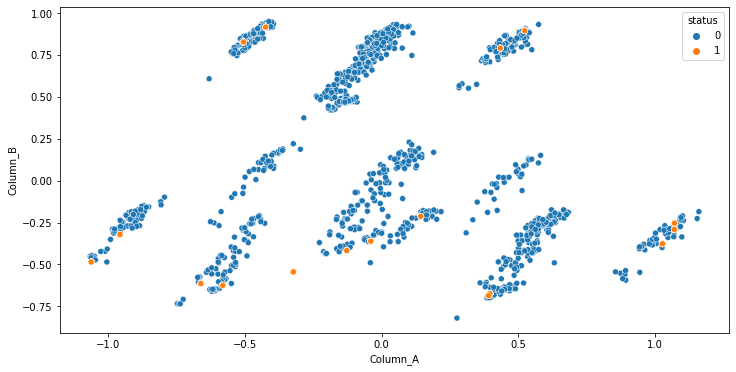

In [ ]:
import seaborn as sns
sns.scatterplot(x = df_pca.Column_A, y = df_pca.Column_B, hue = df_pca.status)

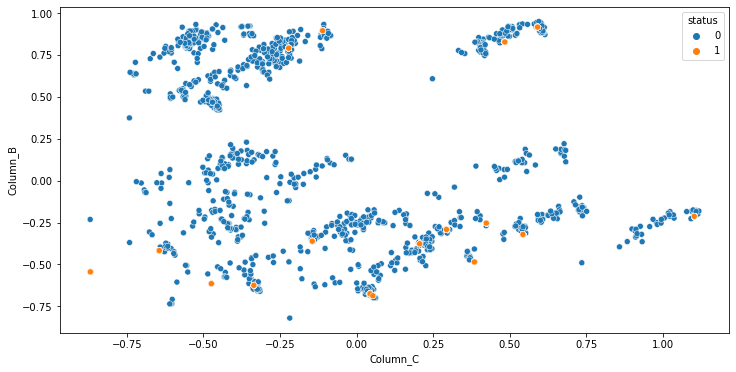

In [ ]:
import seaborn as sns
sns.scatterplot(x = df_pca.Column_C, y = df_pca.Column_B , hue = df_pca.status)